In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import acquire
import prepare
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

### 1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
# Load the spam data set
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head(20)

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

# all messages
all_words = clean(' '.join(df.text))

In [6]:
# Create and explore bigrams for the spam data. Visualize them 
# with a word cloud. How do they compare with the ham bigrams?

# pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam bigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

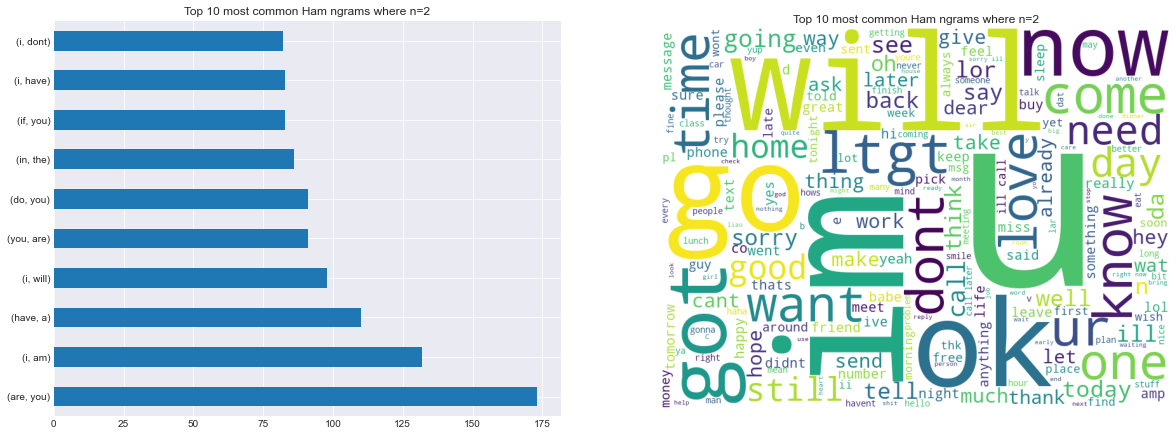

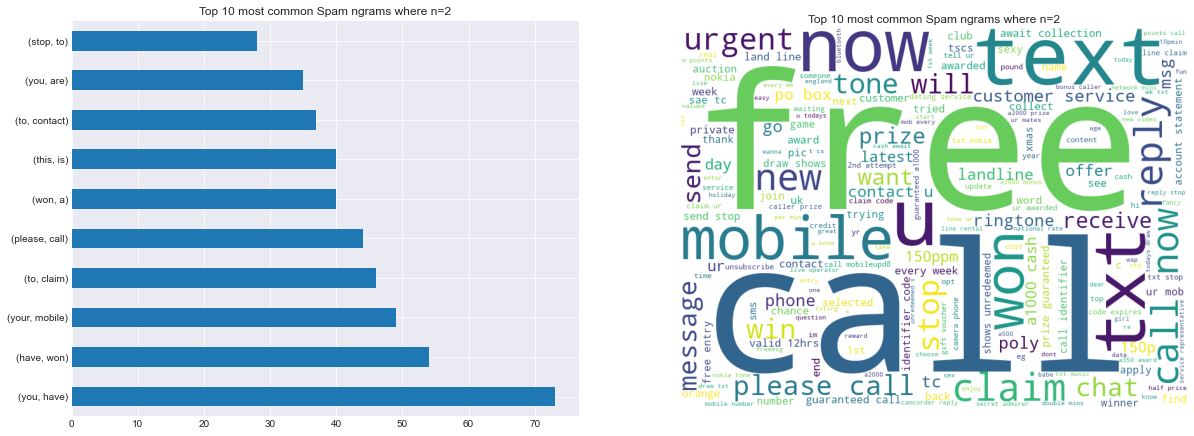

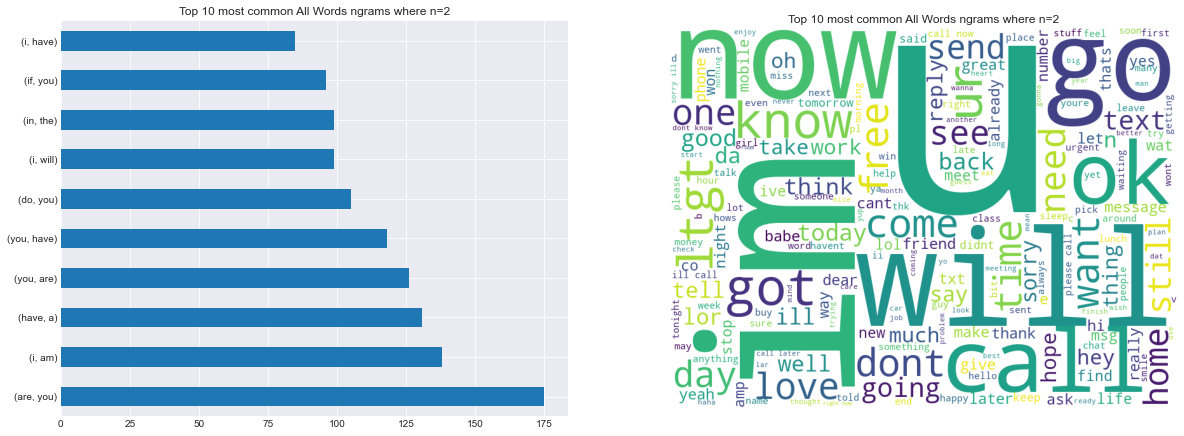

In [8]:
from wordcloud import WordCloud

# img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
# plt.imshow(img)
# plt.axis('off')

text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

In [9]:
# Is there any overlap in the bigrams for the spam data and the 
# ham data?

# yes.  i, have

In [10]:
# Create and explore with trigrams (i.e. a n-gram with an n of 3) 
# for both the spam and ham data.

In [11]:
# pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam trigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

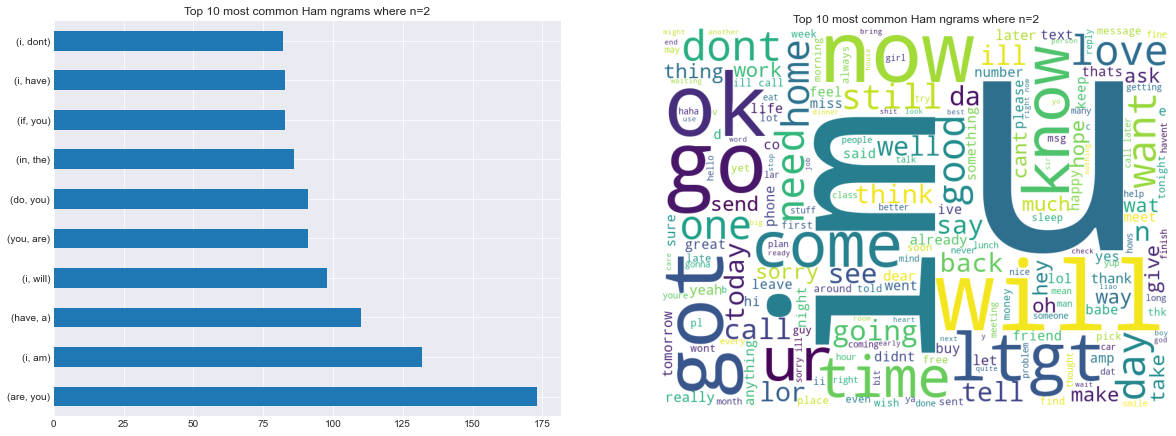

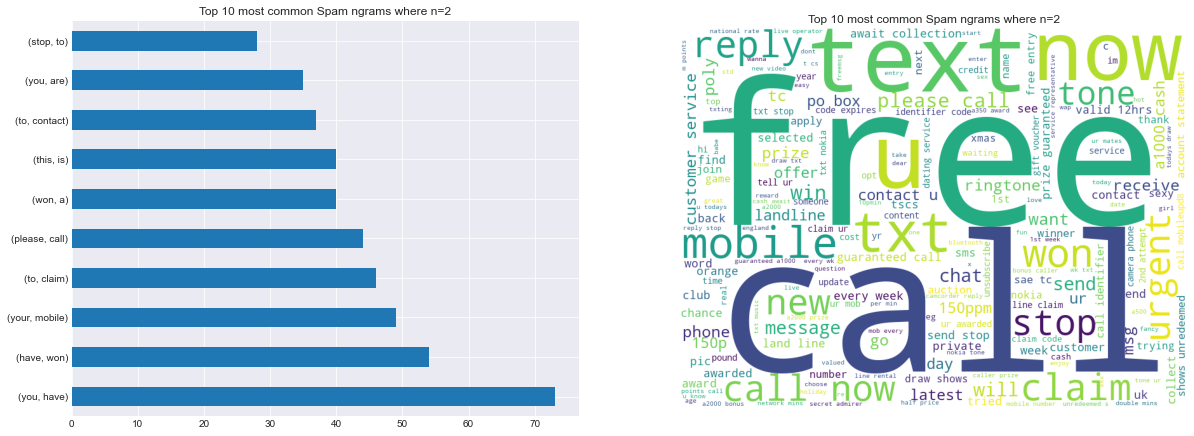

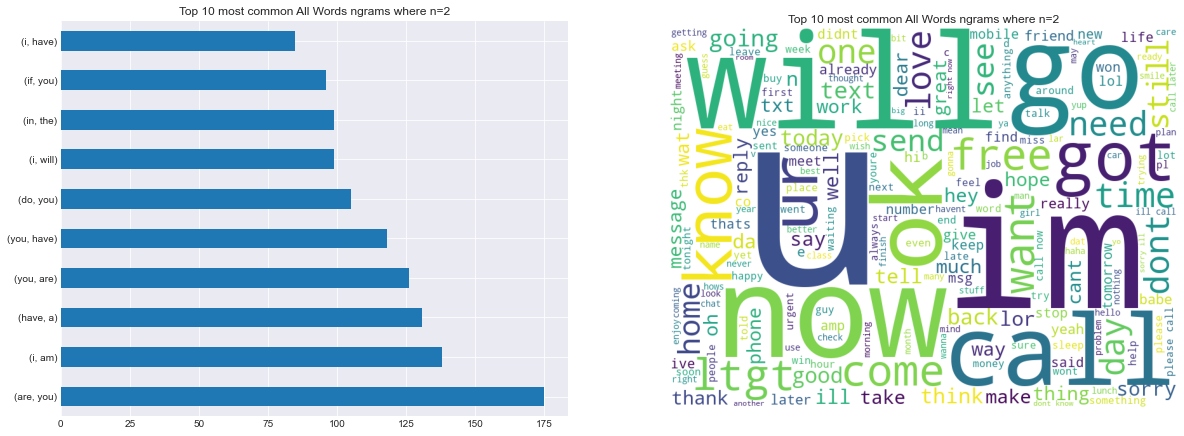

In [12]:
text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

Text(0.5, 1.0, 'Top 10 most common spam trigrams')

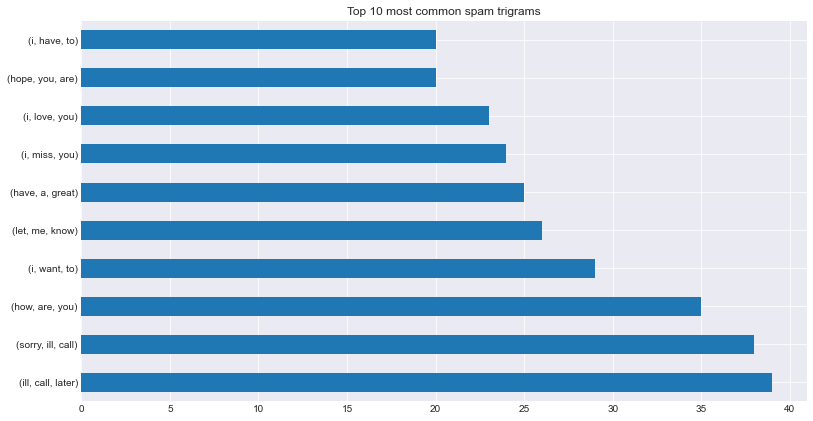

In [13]:
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [14]:
#
urls = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/', 'https://codeup.com/data-science-myths/', 
        'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/', 'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
        'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/']
codeup_df = acquire.get_blog_articles(urls)
codeup_df.head()

/Users/guadalupeluna/Desktop/code-up-data-science/natural-language-processing-exercises/acquire.py:69: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 69 of the file /Users/guadalupeluna/Desktop/code-up-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


,title,published_date,blog_image,content
0,Codeup’s Data Science Career Accelerator is Here!,"September 30, 2018",https://codeup.com/wp-content/uploads/2018/10/...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"October 31, 2018",https://codeup.com/wp-content/uploads/2018/10/...,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"October 17, 2018",https://codeup.com/wp-content/uploads/2018/10/...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,"August 14, 2018",None,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,"August 14, 2018",None,Competitor Bootcamps Are Closing. Is the Model...


In [15]:
# def basic_clean(string):
#     '''
#     This function takes in a string and
#     returns the string normalized.
#     '''
#     string = unicodedata.normalize('NFKD', string)\
#              .encode('ascii', 'ignore')\
#              .decode('utf-8', 'ignore')
#     string = re.sub(r'[^\w\s]', '', string).lower()
#     return string




# def prep_article_data(df, column, extra_words=[], exclude_words=[]):
#     '''
#     This function take in a df and the string name for a text column with
#     option to pass lists for extra_words and exclude_words and
#     returns a df with the text article title, original text, stemmed text,
#     lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
#     '''
#     df['clean'] = df[column].apply(basic_clean)\
#                             .apply(prepare.tokenize)\
#                             .apply(prepare.remove_stopwords,
#                                    extra_words=extra_words,
#                                    exclude_words=exclude_words)
#     df['stemmed'] = df['clean'].apply(prepare.stem)
#     df['lemmatized'] = df['clean'].apply(prepare.lemmatize)
#     return df

In [19]:
# # real words
# ham_words = clean(' '.join(codeup_df[codeup_df.label == 'ham'].text))
# # spam words
# spam_words = clean(' '.join(codeup_df[codeup_df.label == 'spam'].text))

#all words
all_words = clean(' '.join(codeup_df.content))

In [21]:
all_words.split()[:10]

['the',
 'rumors',
 'are',
 'true',
 'the',
 'time',
 'has',
 'arrived',
 'codeup',
 'has']

In [22]:
pd.Series(all_words.split()).value_counts()

the          95
and          81
to           75
data         75
a            60
             ..
majority      1
remember      1
depending     1
server        1
currently     1
Length: 955, dtype: int64

In [23]:
# remove stopwords
article = prepare.remove_stopwords(all_words)
article

'rumors true time arrived codeup officially opened applications new data science career accelerator 25 seats available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution hit san antonio resulting explosion data scientist positions across companies like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demands industry program 18 weeks long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust worked heb capital group rackspace along input dozens practitioners hiring partners students work real data sets realistic problems entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate 

In [24]:
#turn all words into a series
#get value count of all words (after stopwords removed)
pd.Series(article.split()).value_counts()

data         75
science      26
learning     20
machine      14
job          13
             ..
masses        1
accepted      1
majority      1
remember      1
currently     1
Length: 861, dtype: int64

In [25]:
#assign to a variable
word_freq = pd.Series(article.split()).value_counts()
word_freq.head()

data        75
science     26
learning    20
machine     14
job         13
dtype: int64

In [28]:
# pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam bigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

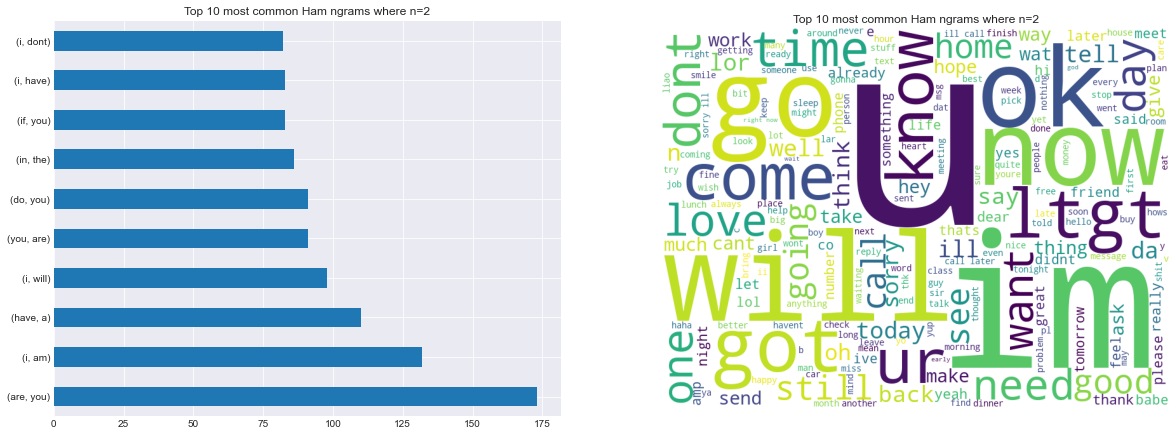

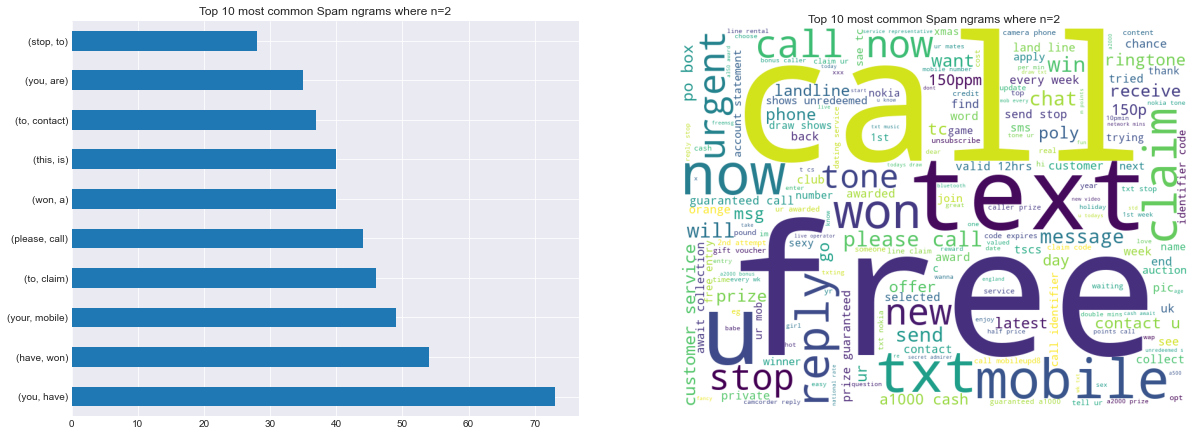

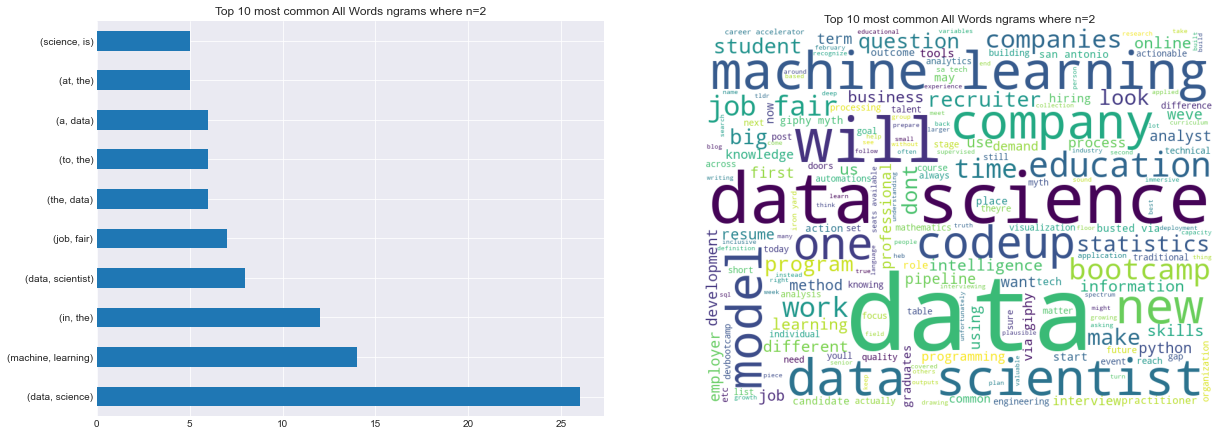

In [29]:
text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [30]:
news = acquire.get_all_news_articles()

TypeError: get_all_news_articles() missing 1 required positional argument: 'categories'